In [2]:
import pandas as pd
import numpy as np

In [9]:
# copied from here: https://stackoverflow.com/a/29805905/7483950
def read_fasta(fp, gzipped=False):
        name, seq = None, []
        for line in fp:
            if gzipped:
                line = line.decode()
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line[1:], []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

In [10]:
fasta_file = "/projects/robustmicrob/jlaw/projects/deepet/DeepET_reps-main/deepet/cleaned_enzyme_topts_v1.fasta"
with open(fasta_file, 'r') as f:
    seq_dict = {name: seq for name, seq in read_fasta(f)}
list(seq_dict.items())[:2]

[('K9L4P7 ogt=24;topt=37.0',
  'MKSTIITSILFSVATVQAYSPAEQIDVQSHLLSDPTKVEGKTYDYVIAGGGLTGLTVASKLSENPKIKVLVIEKGFYESNDGPIIEDPNAYGEIFGTSVDQNYLTVPLINNRTGEIKSGLGLGGSTLINGDSWTRPDKVQIDSWEKVFGMEGWNWDNVFQYMQKAERSRPPTAAQIEAGHFYDPACHGTDGTVHAGPRDNGKPWSPLMRALMNTVSAFGVPVQKDFHCGHPRGVSMIPNNLHENQIRADAAREWLLPNYQRDNLQILTGQKVGKVLFNQTASGPKAVGVNFGTNKAVNFNVYAKQEVLLAAGSAISPLILEYSGIGIKSVLDKAGVKQLLELPVGLNMQDQTTTTVRSRANNAPGQGQAAYFANFTEVLGDHAAQGINLLDTKLDQWAEETVARGGFHNVTALKIQYENYRNWLLDEDVAFAELFFDTEGKINFDIWNLIPFTRGSVHILSSDPYLWQYANDPKFFMNELDLLGQAAATKLGRELSSAGEMKKYYAGETIPGDNLPQDATVEQWEDYVMMNFRPNWHAVSTCSMMSRELGGVVDATAKVYGTQGLRVIDGSIPPTQVSSHVMTVFYGMALRIAESVLEDYAKSA'),
 ('Q9L7P2 ogt=26;topt=42.0',
  'MQTPKLIRPTLLSMAILSSMAWATGASAALVPPKGYDAPIEKMKTGDHNFSCEAIPKPYTDKLVFRSKYEGSDKARATLNAVSEEAFRDATKDITTLERGVSKVVMQYMRDGRPEQLDCALNMMTTWAKADALESREFNHTGKSMRKWALGSMSSAYLRLKFSESHPLANRQQDAKIIETWFSKLADQVVSDWSNLPLEKINNHSYWAAWSVMATAVATNRQDLFDWAVKEYKVAANQVDKDGFLPNEMKRRQRALSYHNYALPPLAMIASFAQANGVDLRPENNGALKRLGDRVLAGVKDPSIFAEHNGEKQDMTDLKKDPKFAWLE

In [13]:
rows = []
for data, seq in seq_dict.items():
    u_id, t_data = data.split(' ')
    ogt, topt = t_data.split(';')
    rows.append((u_id, ogt.split('=')[1], topt.split('=')[1], seq))
df = pd.DataFrame(rows, columns=['uniprot_id', 'ogt', 'topt', 'sequence'])
df.head(2)

,uniprot_id,ogt,topt,sequence
0,K9L4P7,24,37.0,MKSTIITSILFSVATVQAYSPAEQIDVQSHLLSDPTKVEGKTYDYV...
1,Q9L7P2,26,42.0,MQTPKLIRPTLLSMAILSSMAWATGASAALVPPKGYDAPIEKMKTG...


In [15]:
df['topt'] = df['topt'].astype(float)

In [17]:
df['ogt'] = df['ogt'].astype(float)

<AxesSubplot: ylabel='Frequency'>

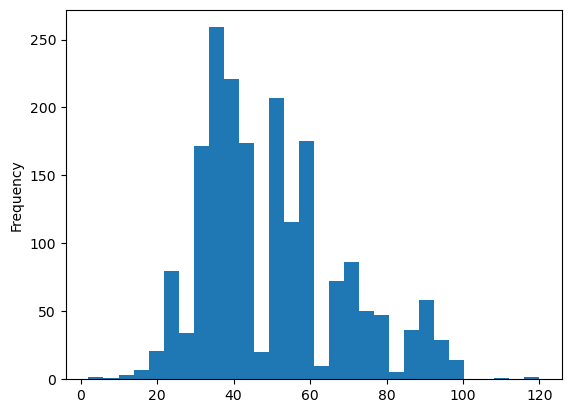

In [16]:
df.topt.plot.hist(bins=30)

In [20]:
import matplotlib.pyplot as plt

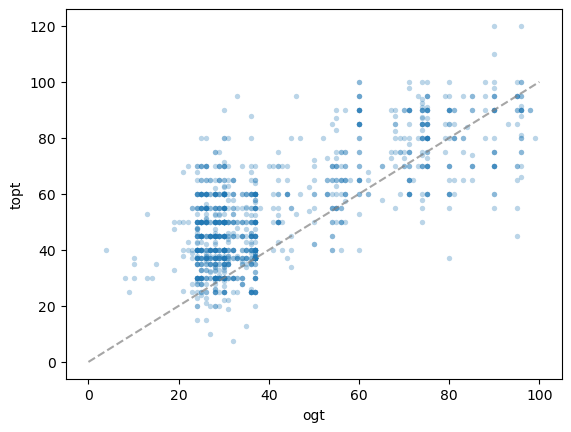

In [26]:
df.plot.scatter('ogt', 'topt', alpha=0.3, lw=0, s=15)
plt.plot([0,100], [0,100], '--', c='gray', alpha=0.7)